# Stock Price EDA

Table of context:
- [SP500](#sp500)
- [China](#china)
- [USA](#usa)
- [Japan](#japan)
- [Switzerland](#swiss)


In [31]:
import pandas as pd
import datetime as dt
import numpy as np
import operator
import statsmodels
import statsmodels.tsa.seasonal
import warnings

from importlib import reload 
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [183]:
import stock_analysis_functions
reload(stock_analysis_functions)
from stock_analysis_functions import data_from_yahoo, fill_nan, extract_max, plot_price, plot_price_rolling
from stock_analysis_functions import returns, get_sp500_stocks_data, create_SP500_index, create_merge_SP500_index
from stock_analysis_functions import plot_variance, plot_rolling_timeseries, plot_sp500_comparison, plot_sp500_comparison_rolling

In [181]:
# import tickers
import tickers
reload(tickers)
from tickers import japan_tickers, china_tickers, us_tickers, ticker_id, swiss_tickers

In [150]:
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2020, 12, 1)

In [151]:
country_names = ['China', 'USA', 'Japan', 'Switzerland']

In [184]:
#datasets_swiss = data_from_yahoo(swiss_tickers, ticker_id, start, end, 'swiss')

In [185]:
# take the stock data from yahoo for the countries

# the first time we run the script read is False, because we have to extract and save the data.
# this work is particularly time consuming (especially with my computer), so we run it only once on
# Colab and then we only read the data.

datasets_chn = data_from_yahoo(china_tickers, ticker_id, start, end, 'china', read=True)
datasets_us = data_from_yahoo(us_tickers, ticker_id, start, end, 'usa', read=True)
datasets_jpn = data_from_yahoo(japan_tickers, ticker_id, start, end, 'japan', read=True)
datasets_swiss = data_from_yahoo(swiss_tickers, ticker_id, start, end, 'swiss', read=True)

In [186]:
adj_close = {'China':datasets_chn['adj_close'], 'USA':datasets_us['adj_close'], 'Japan':datasets_jpn['adj_close'], 'Switzerland':datasets_swiss['adj_close']}
openn = {'China':datasets_chn['open'], 'USA':datasets_us['open'], 'Japan':datasets_jpn['open'], 'Switzerland':datasets_swiss['open']}
close = {'China':datasets_chn['close'], 'USA':datasets_us['close'], 'Japan':datasets_jpn['close'], 'Switzerland':datasets_swiss['close']}
high = {'China':datasets_chn['high'], 'USA':datasets_us['high'], 'Japan':datasets_jpn['high'], 'Switzerland':datasets_swiss['high']}
low = {'China':datasets_chn['low'], 'USA':datasets_us['low'], 'Japan':datasets_jpn['low'], 'Switzerland':datasets_swiss['low']}


In [187]:
index = adj_close['China']['Date'] # take the index from a random datasets (same index for all)

In [188]:
# filNaN
adj_close= fill_nan (adj_close, index, 'adj_close')
openn= fill_nan (openn, index, 'openn')
close= fill_nan (close, index, 'close')


adj_close
 
China: 

Totally, in the dataset there are 492 NaNs values
After the filling thought the mean, in the dataset there are 0 NaNs values
 
USA: 

Totally, in the dataset there are 0 NaNs values
 
Japan: 

Totally, in the dataset there are 31 NaNs values
After the filling thought the mean, in the dataset there are 2 NaNs values
After the filling of first/last values, in the dataset there are 0 NaNs values
 
Switzerland: 

Totally, in the dataset there are 177 NaNs values
After the filling thought the mean, in the dataset there are 58 NaNs values
After the filling of first/last values, in the dataset there are 0 NaNs values

openn
 
China: 

Totally, in the dataset there are 492 NaNs values
After the filling thought the mean, in the dataset there are 0 NaNs values
 
USA: 

Totally, in the dataset there are 0 NaNs values
 
Japan: 

Totally, in the dataset there are 31 NaNs values
After the filling thought the mean, in the dataset there are 2 NaNs values
After the filling of firs

# SP500 <a class="anchor" id="sp500"></a>

In [189]:
#df_sp500_stocks = get_sp500_stocks_data(index, start, end)

In [190]:
df_sp500_stocks = get_sp500_stocks_data(index, start, end, read=True)

In [191]:
df_sp500_stocks.head()

Adj Close         Adj Close.1         Adj Close.2  \
0                  A                 AAL                 AAP   
1                NaN                 NaN                 NaN   
2  84.62352752685547  28.574403762817383  158.65269470214844   
3  85.25837707519531  28.982892990112305  157.90972900390625   
4  83.88947296142578  27.548194885253906   157.9196319580078   

         Adj Close.3        Adj Close.4        Adj Close.5  \
0               AAPL               ABBV                ABC   
1                NaN                NaN                NaN   
2    72.783935546875  83.89559936523438  83.53189849853516   
3   74.4446029663086  84.85260772705078  83.59085845947266   
4  73.72084045410156  84.04720306396484  82.53959655761719   

          Adj Close.6        Adj Close.7        Adj Close.8  \
0                ABMD                ABT                ACN   
1                 NaN                NaN                NaN   
2  170.58999633789062  85.51184844970703  207.2430877685547   
3  168.80999755859375  85.60044860839844  206.8297119140625   
4  166.82000732421875   84.5569076538086  206.4852294921875   

          Adj Close.9  ... Volume.496 Volume.497 Volume.498 Volume.499  \
0                ADBE  ...        XOM       XRAY        XRX        XYL   
1                 NaN  ...        NaN        NaN        NaN        NaN   
2  329.80999755859375  ...   13151800    1211000    1380100     492000   
3  334.42999267578125  ...   12456400    1556600    1581300     869500   
4  331.80999755859375  ...   17386900     910000    1042600     795100   

  Volume.500 Volume.501 Volume.502 Volume.503 Volume.504 Date  
0        YUM        ZBH       ZBRA       ZION        ZTS  NaN  
1        NaN        NaN        NaN        NaN        NaN  NaN  
2    1271000     612400     363500    1246900    1128600  NaN  
3    1369900    1052400     387800    1528700    1576700  NaN  
4    1145500     963500     305300    1215800    1274000  NaN  

[5 rows x 3031 columns]

In [192]:
# only Adj Close prices, no volume
columns_adj_prices = [col for col in df_sp500_stocks if col.startswith('Adj Close')]
df_sp500_stocks = df_sp500_stocks[columns_adj_prices]

In [193]:
# correct columns names:
df_sp500_stocks = df_sp500_stocks.rename(columns=df_sp500_stocks.iloc[0]) # rename columns first line
df_sp500_stocks = df_sp500_stocks.drop(df_sp500_stocks.index[0]) # dlete first line
df_sp500_stocks = df_sp500_stocks.drop(df_sp500_stocks.index[0]) # delete data row'''
df_sp500_stocks['Date'] = index # we check this was fine !
df_sp500_stocks = df_sp500_stocks[df_sp500_stocks['Date'].isnull()==False]
df_sp500_stocks = df_sp500_stocks.set_index('Date')
#df_sp500_stocks = df_sp500_stocks.drop('Date', axis=1)

df_sp500_stocks.head()

A                 AAL                 AAP  \
Date                                                                    
2020-01-06  84.62352752685547  28.574403762817383  158.65269470214844   
2020-01-07  85.25837707519531  28.982892990112305  157.90972900390625   
2020-01-08  83.88947296142578  27.548194885253906   157.9196319580078   
2020-01-09  84.13746643066406  27.219409942626953  155.32431030273438   
2020-01-10  84.39537811279297   27.11977767944336  153.48182678222656   

                         AAPL               ABBV                ABC  \
Date                                                                  
2020-01-06    72.783935546875  83.89559936523438  83.53189849853516   
2020-01-07   74.4446029663086  84.85260772705078  83.59085845947266   
2020-01-08  73.72084045410156  84.04720306396484  82.53959655761719   
2020-01-09  74.30826568603516  84.71047973632812  83.74805450439453   
2020-01-10  73.95879364013672  84.22723388671875  83.14872741699219   

                          ABMD                ABT                 ACN  \
Date                                                                    
2020-01-06  170.58999633789062  85.51184844970703   207.2430877685547   
2020-01-07  168.80999755859375  85.60044860839844   206.8297119140625   
2020-01-08  166.82000732421875   84.5569076538086   206.4852294921875   
2020-01-09   179.0399932861328  84.99991607666016  205.13690185546875   
2020-01-10  180.35000610351562   84.5273666381836   200.7079620361328   

                          ADBE  ...                XLNX                XOM  \
Date                            ...                                          
2020-01-06  329.80999755859375  ...   96.29391479492188  64.61932373046875   
2020-01-07  334.42999267578125  ...  100.11534881591797    65.656494140625   
2020-01-08  331.80999755859375  ...   97.81067657470703  65.12865447998047   
2020-01-09   333.7099914550781  ...   95.77192687988281  65.62871551513672   
2020-01-10   333.3900146484375  ...   97.95840454101562  65.09160614013672   

                          XRAY                 XRX                XYL  \
Date                                                                    
2020-01-06   56.05650329589844  34.930084228515625  77.76145935058594   
2020-01-07    56.3932991027832   34.98693084716797  78.80762481689453   
2020-01-08   55.76923751831055   34.53218460083008       79.271484375   
2020-01-09  56.076316833496094   34.01112747192383  78.75828552246094   
2020-01-10   56.37348937988281   34.05849075317383  78.46219635009766   

                           YUM                 ZBH                ZBRA  \
Date                                                                     
2020-01-06    98.8283462524414   148.4962615966797  255.44000244140625   
2020-01-07  100.24114990234375   148.0200653076172   259.1400146484375   
2020-01-08   99.92719268798828  147.63314819335938  256.04998779296875   
2020-01-09   99.86833190917969   146.7799530029297    258.010009765625   
2020-01-10  100.04493713378906  146.65097045898438   256.4700012207031   

                          ZION                 ZTS  
Date                                                
2020-01-06   50.02912139892578  131.59608459472656  
2020-01-07  50.530181884765625   133.3759002685547  
2020-01-08  49.817134857177734  133.39578247070312  
2020-01-09  49.210079193115234   132.3716583251953  
2020-01-10   48.91136932373047  132.81907653808594  

[5 rows x 505 columns]

In [194]:
# values from string to float
for c in df_sp500_stocks.columns:
    try:
        df_sp500_stocks[c] = pd.to_numeric(df_sp500_stocks[c])
    except:
        pass
    
print(df_sp500_stocks.info())

<class 'pandas.core.frame.DataFrame'>
Index: 230 entries, 2020-01-06 to 2020-12-01
Columns: 505 entries, A to ZTS
dtypes: float64(505)
memory usage: 909.2+ KB
None


In [195]:
dict_sp500 = {'SP500': df_sp500_stocks} # trasform to dict to use the same fucntion we defined for the stocks
dict_sp500 = fill_nan(dict_sp500, index, 'SP500', False)
df_sp500_stocks = dict_sp500['SP500']


SP500
 
SP500: 

Totally, in the dataset there are 409 NaNs values
After the filling thought the mean, in the dataset there are 358 NaNs values
After the filling of first/last values, in the dataset there are 0 NaNs values


In [196]:
df_sp500_stocks.head()

A        AAL         AAP       AAPL       ABBV        ABC  \
Date                                                                            
2020-01-06  84.623528  28.574404  158.652695  72.783936  83.895599  83.531898   
2020-01-07  85.258377  28.982893  157.909729  74.444603  84.852608  83.590858   
2020-01-08  83.889473  27.548195  157.919632  73.720840  84.047203  82.539597   
2020-01-09  84.137466  27.219410  155.324310  74.308266  84.710480  83.748055   
2020-01-10  84.395378  27.119778  153.481827  73.958794  84.227234  83.148727   

                  ABMD        ABT         ACN        ADBE  ...        XLNX  \
Date                                                       ...               
2020-01-06  170.589996  85.511848  207.243088  329.809998  ...   96.293915   
2020-01-07  168.809998  85.600449  206.829712  334.429993  ...  100.115349   
2020-01-08  166.820007  84.556908  206.485229  331.809998  ...   97.810677   
2020-01-09  179.039993  84.999916  205.136902  333.709991  ...   95.771927   
2020-01-10  180.350006  84.527367  200.707962  333.390015  ...   97.958405   

                  XOM       XRAY        XRX        XYL         YUM  \
Date                                                                 
2020-01-06  64.619324  56.056503  34.930084  77.761459   98.828346   
2020-01-07  65.656494  56.393299  34.986931  78.807625  100.241150   
2020-01-08  65.128654  55.769238  34.532185  79.271484   99.927193   
2020-01-09  65.628716  56.076317  34.011127  78.758286   99.868332   
2020-01-10  65.091606  56.373489  34.058491  78.462196  100.044937   

                   ZBH        ZBRA       ZION         ZTS  
Date                                                       
2020-01-06  148.496262  255.440002  50.029121  131.596085  
2020-01-07  148.020065  259.140015  50.530182  133.375900  
2020-01-08  147.633148  256.049988  49.817135  133.395782  
2020-01-09  146.779953  258.010010  49.210079  132.371658  
2020-01-10  146.650970  256.470001  48.911369  132.819077  

[5 rows x 505 columns]

# China  <a class="anchor" id="china"></a>

In [197]:
country = 'China'

In [198]:
index = adj_close[country]['Date'] 

### Correlation Matrix adj prices

In [199]:
print(f"Corr Matrix Adj Prices first 50 companies China")
corr = adj_close[country].corr() 
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Corr Matrix Adj Prices first 50 companies China


In [200]:
# name first 5
name_important_stocks = extract_max(adj_close[country], 5, Names=True)

# dataset first 5
adj_close_imp = adj_close[country][name_important_stocks]
adj_close_imp['Data'] = index
adj_close_imp = adj_close_imp.set_index('Data')
adj_close_imp.head()

MOUTAI     MINDRAY        BABA      CTGDF      FOSHAN
Data                                                                  
2020-01-02  1116.952637  179.320694  219.770004  89.709709  106.899536
2020-01-03  1066.106689  177.003738  217.000000  90.636192  104.335930
2020-01-06  1065.543213  175.631454  216.639999  89.659897  102.564171
2020-01-07  1081.892212  179.688614  217.630005  90.566460  104.919914
2020-01-08  1075.576050  179.141693  218.000000  90.954987  105.088181

In [201]:
# first 5 companies
print(f"Corr Matrix Adj Prices first 5 companies China")
corr = adj_close_imp.corr() 
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Corr Matrix Adj Prices first 5 companies China


### Plot time series adjusted closing price

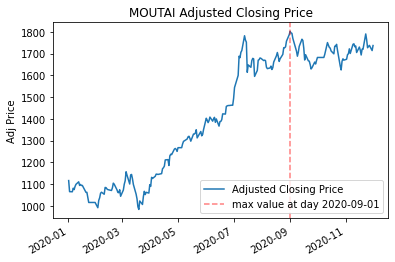

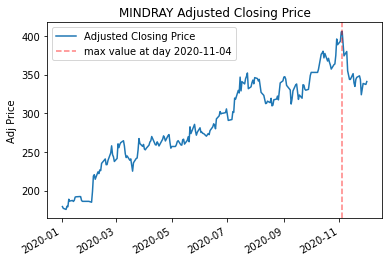

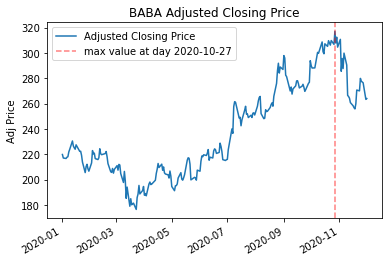

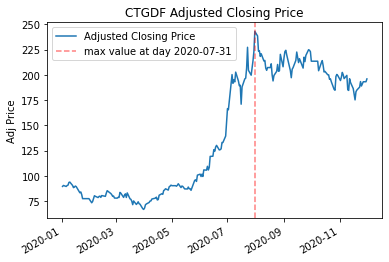

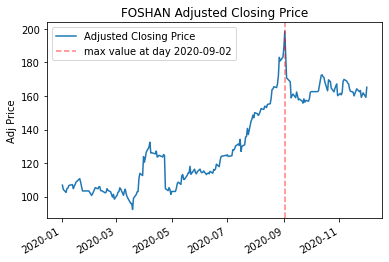

In [202]:
plot_price(index, adj_close_imp, name_important_stocks, country, 'Adjusted Closing Price', 'Adj Price')

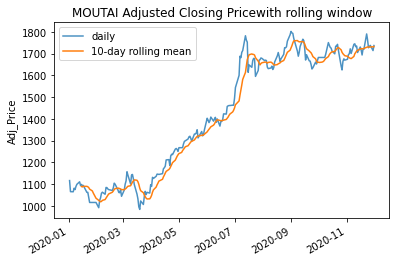

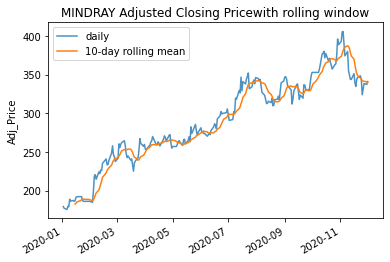

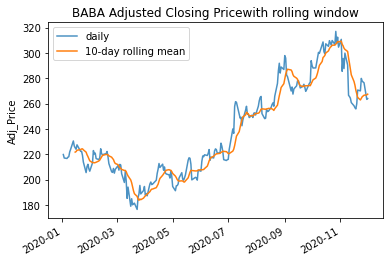

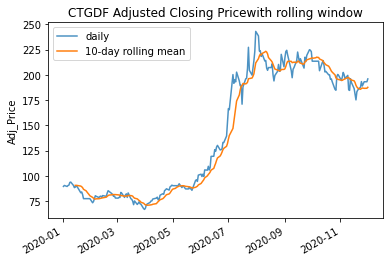

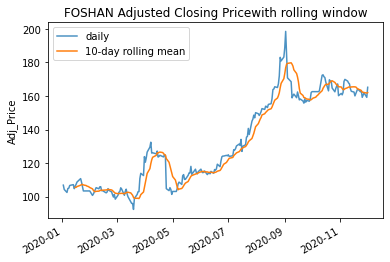

In [203]:
# plot with rolling of 10 days
plot_price_rolling(index, adj_close_imp, 10, name_important_stocks, country, 'Adjusted Closing Price', 'Adj_Price')

### Variance adjusted prices

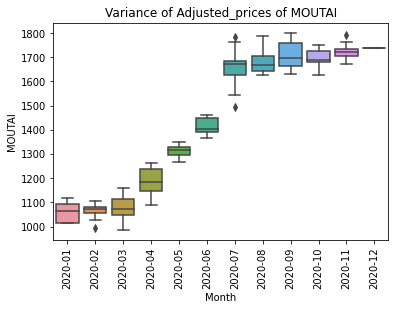

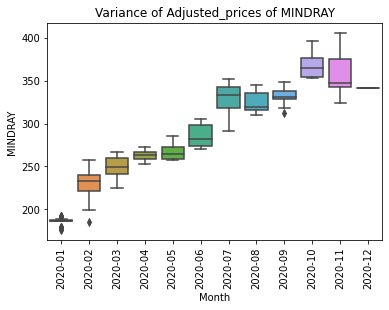

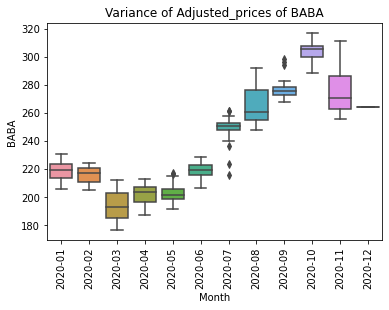

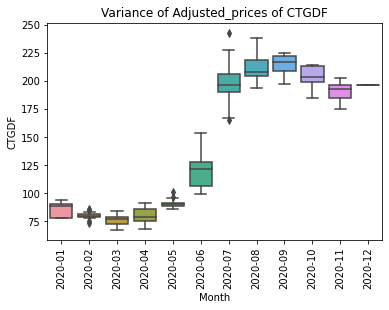

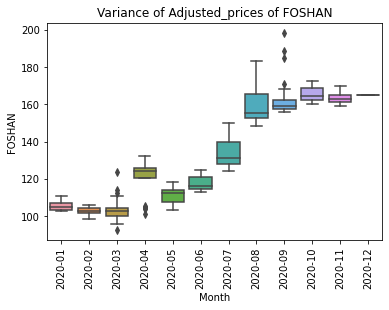

In [204]:
plot_variance(name_important_stocks, adj_close_imp, country, 'Adjusted_prices')

### Return:

$R_t = \frac{S_t-S_{t-1}}{S_{t-1}}$

In [205]:
# return only top stocks
df_returns = returns(name_important_stocks, adj_close_imp, index, country)
df_returns.head()

MOUTAI   MINDRAY      BABA     CTGDF    FOSHAN
Date                                                        
2020-01-02       NaN       NaN       NaN       NaN       NaN
2020-01-03 -4.552203 -1.292074 -1.260411  1.032757 -2.398145
2020-01-06 -0.052854 -0.775285 -0.165899 -1.077159 -1.698129
2020-01-07  1.534335  2.310041  0.456982  1.011113  2.296848
2020-01-08 -0.583807 -0.304371  0.170011  0.428996  0.160376

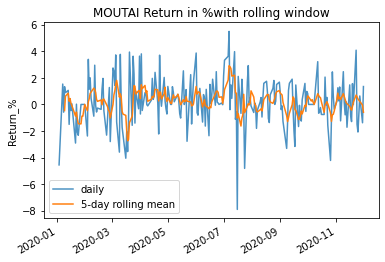

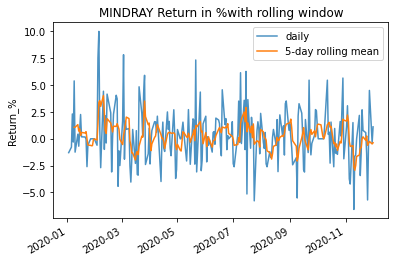

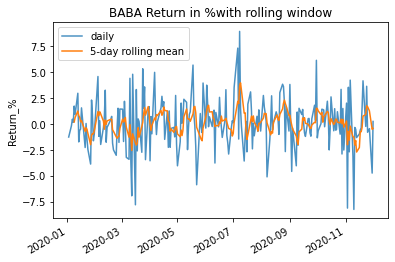

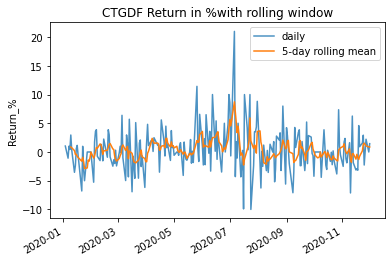

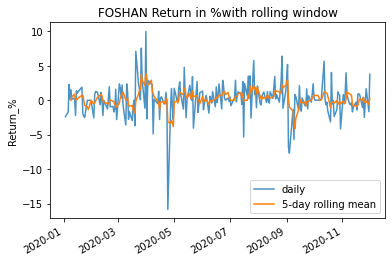

In [206]:
plot_price_rolling(index, df_returns, 5, name_important_stocks, country, 'Return in %', 'Return_%')

### Variance Returns

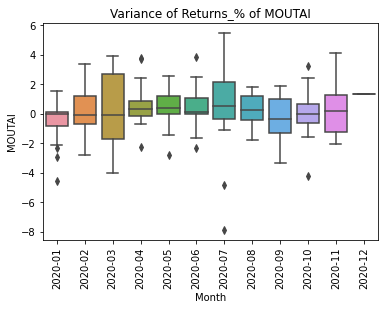

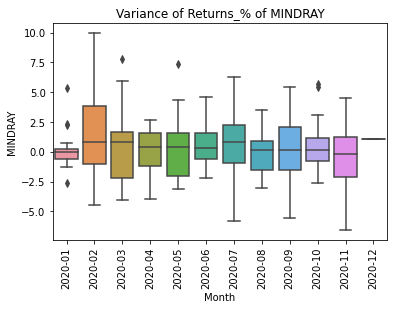

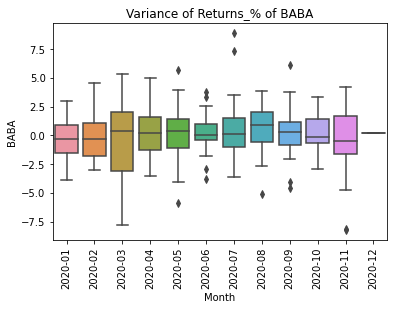

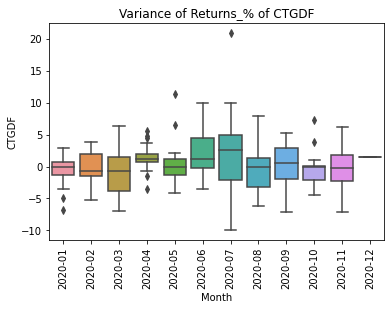

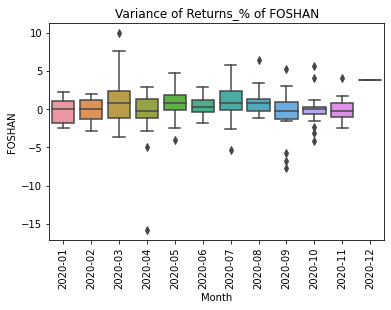

In [207]:
plot_variance(name_important_stocks, df_returns, country, 'Returns_%')

### Plot difference difference open closing

In order to understand how much they loose each day

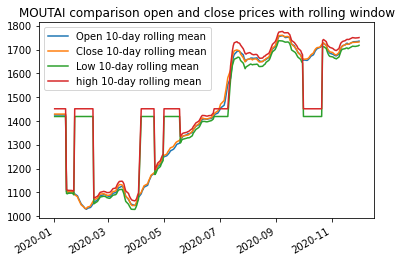

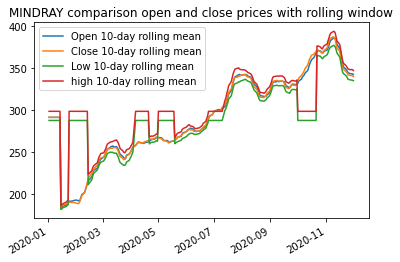

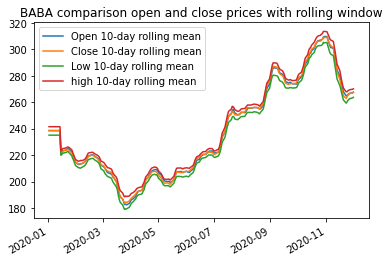

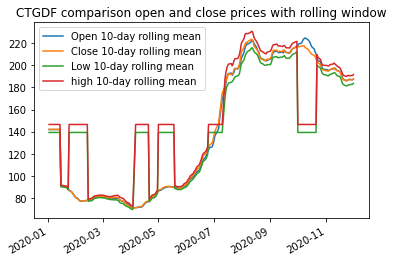

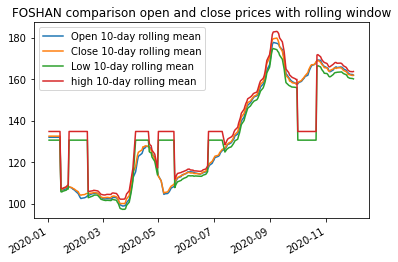

In [208]:
df = {'open': openn[country], 'close': close[country], 'high': high[country], 'low': low[country]}

plot_rolling_timeseries(index, name_important_stocks, df, 10, country, 'comparison open and close prices')

### Comparison SP500

In [209]:
#  create the SP500 dataframe and merge it to tnhe returns dataframe
df_returns_sp500 = create_merge_SP500_index(df_sp500_stocks, df_returns)
df_returns_sp500.head()

MOUTAI   MINDRAY      BABA     CTGDF    FOSHAN     SP500
Date                                                                  
2020-01-07  1.534335  2.310041  0.456982  1.011113  2.296848  0.549624
2020-01-08 -0.583807 -0.304371  0.170011  0.428996  0.160376 -0.370652
2020-01-09  1.338048  5.389954  1.733944  2.957283  1.525862  0.251415
2020-01-10  0.888743 -1.243019  0.924341  0.361693  0.157713 -0.071727
2020-01-13  1.057971  0.426672  2.971002 -3.540377  0.314929  0.347526

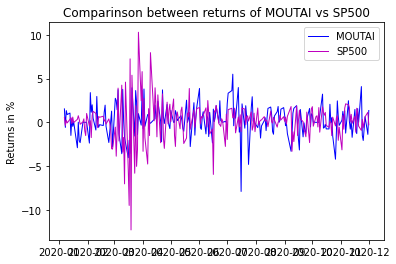

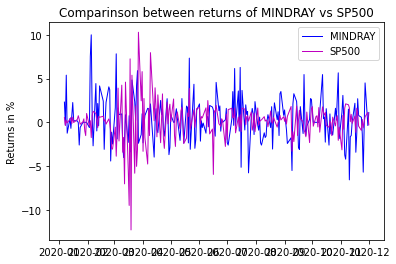

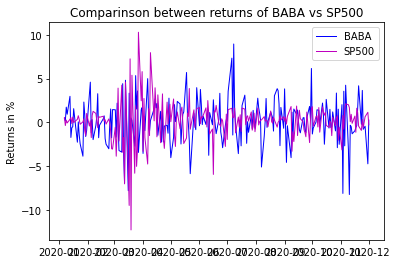

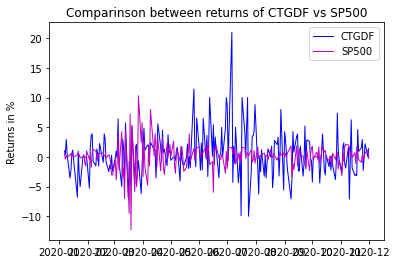

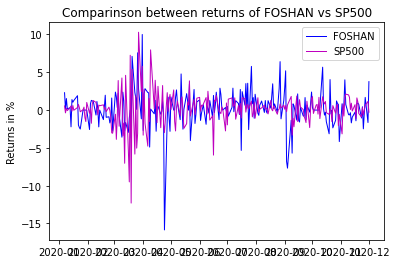

In [210]:
plot_sp500_comparison (df_returns_sp500, name_important_stocks, country, 'returns')

In this way it is really hard to enderstand (no good plot). Therefore, let us work with rolling windows, which lend to much more readable results

**Comparison with Rolling Windows:**

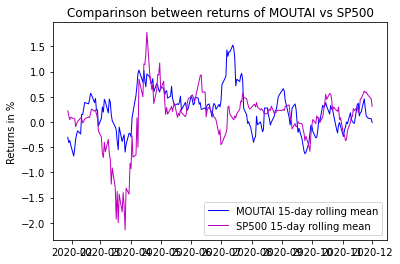

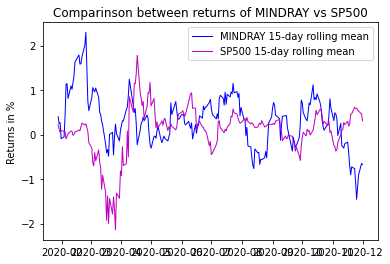

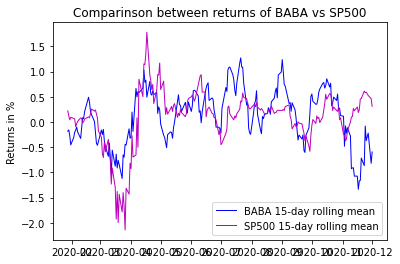

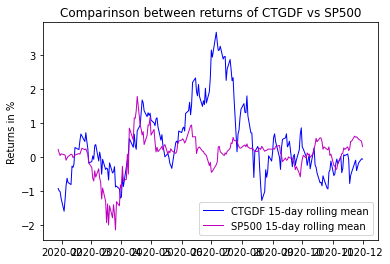

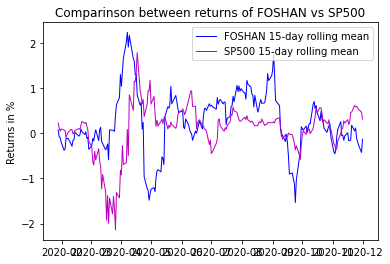

In [211]:
plot_sp500_comparison_rolling (df_returns_sp500, name_important_stocks, 15, country, 'returns')

# USA  <a class="anchor" id="usa"></a>

In [212]:
country = 'USA'

In [213]:
index = adj_close[country]['Date'] 

### Correlation Matrix adj prices

In [214]:
print(f"Corr Matrix Adj Prices first 50 companies China")
corr = adj_close[country].corr() 
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Corr Matrix Adj Prices first 50 companies China


In [215]:
# name first 5
name_important_stocks = extract_max(adj_close[country], 5, Names=True)

# dataset first 5
adj_close_imp = adj_close[country][name_important_stocks]
adj_close_imp['Data'] = index
adj_close_imp = adj_close_imp.set_index('Data')
adj_close_imp.head()

BRK-A         AMZN         GOOG        GOOGL        NFLX
Data                                                                 
2020-01-02  342261  1898.010010  1367.369995  1368.680054  329.809998
2020-01-03  339155  1874.969971  1360.660034  1361.520020  325.899994
2020-01-06  340210  1902.880005  1394.209961  1397.810059  335.829987
2020-01-07  338901  1906.859985  1393.339966  1395.109985  330.750000
2020-01-08  339188  1891.969971  1404.319946  1405.040039  339.260010

In [216]:
# first 5 companies
print(f"Corr Matrix Adj Prices first 5 companies China")
corr = adj_close_imp.corr() 
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Corr Matrix Adj Prices first 5 companies China


### Plot time series adjusted closing price

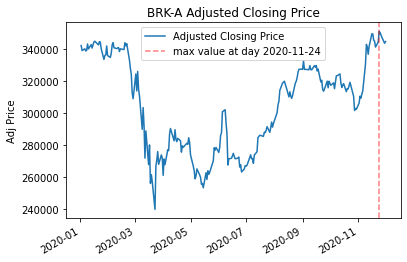

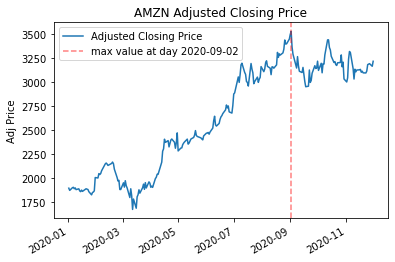

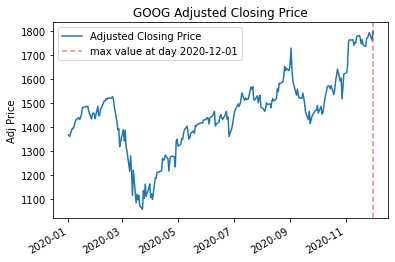

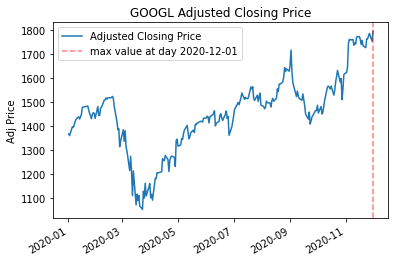

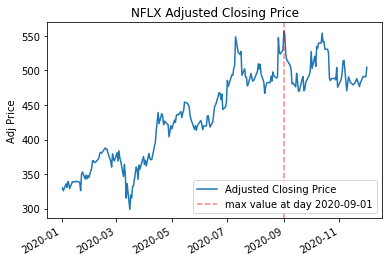

In [217]:
plot_price(index, adj_close_imp, name_important_stocks, country, 'Adjusted Closing Price', 'Adj Price')

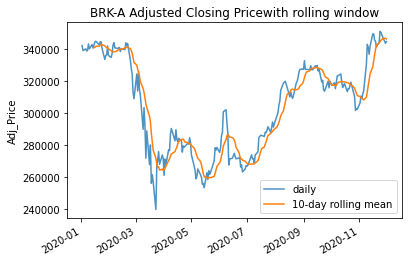

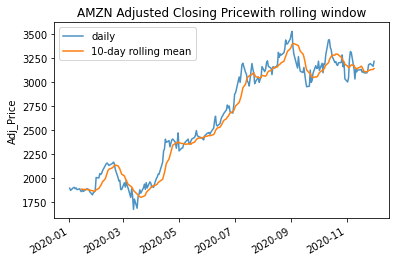

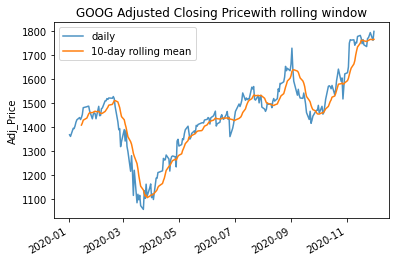

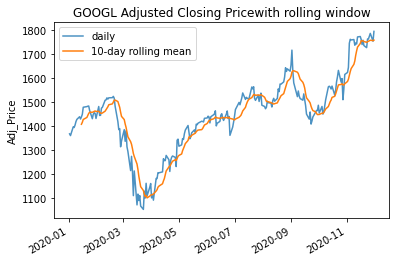

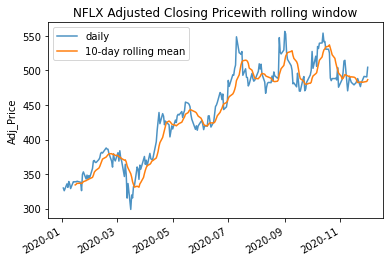

In [218]:
# plot with rolling of 10 days
plot_price_rolling(index, adj_close_imp, 10, name_important_stocks, country, 'Adjusted Closing Price', 'Adj_Price')

### Variance adjusted prices

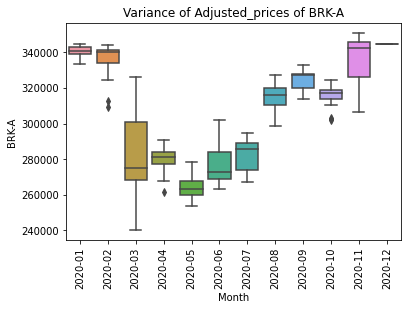

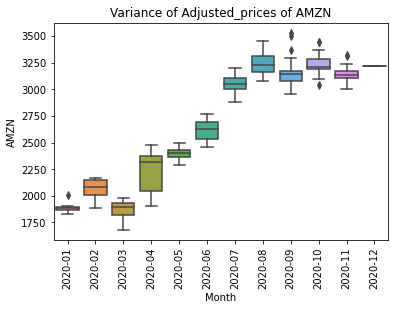

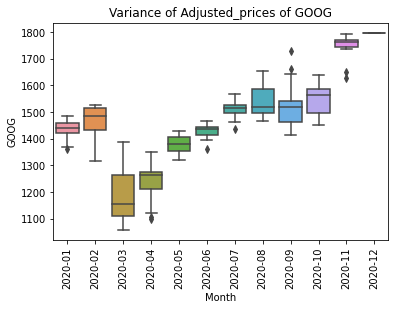

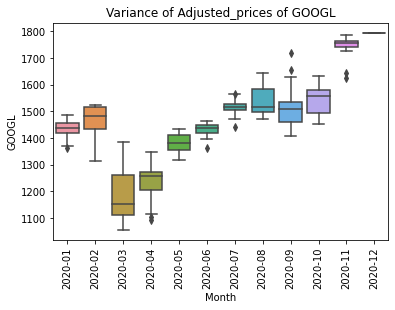

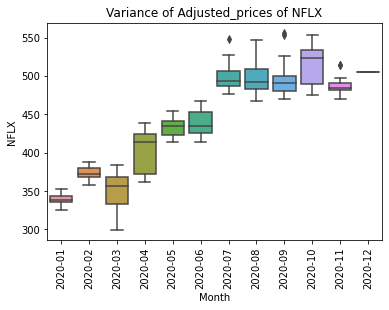

In [219]:
plot_variance(name_important_stocks, adj_close_imp, country, 'Adjusted_prices')

### Return:

$R_t = \frac{S_t-S_{t-1}}{S_{t-1}}$

In [220]:
df_returns = returns(name_important_stocks, adj_close_imp, index, country)
df_returns.head()

BRK-A      AMZN      GOOG     GOOGL      NFLX
Date                                                        
2020-01-02       NaN       NaN       NaN       NaN       NaN
2020-01-03 -0.907495 -1.213905 -0.490720 -0.523134 -1.185532
2020-01-06  0.311067  1.488559  2.465710  2.665406  3.046945
2020-01-07 -0.384762  0.209156 -0.062401 -0.193165 -1.512666
2020-01-08  0.084685 -0.780866  0.788033  0.711776  2.572943

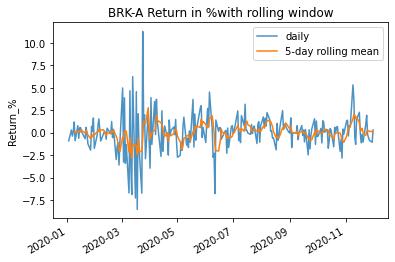

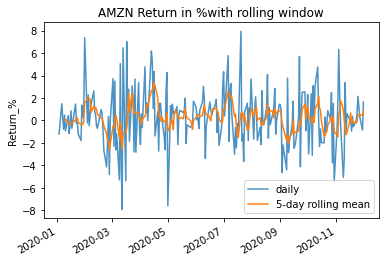

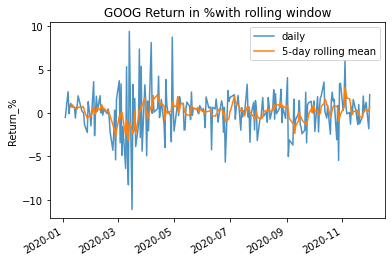

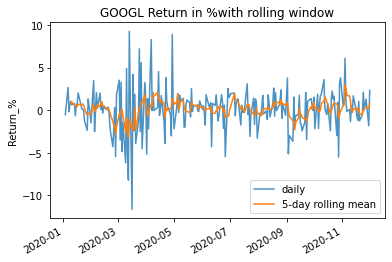

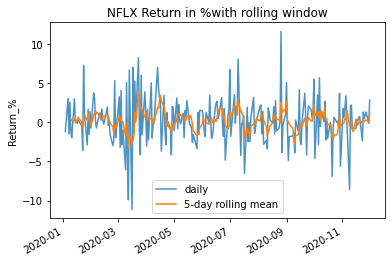

In [221]:
plot_price_rolling(index, df_returns, 5, name_important_stocks, country, 'Return in %', 'Return_%')

### Variance Returns

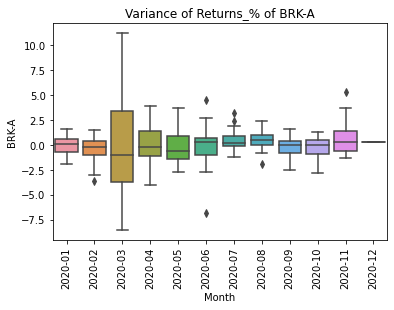

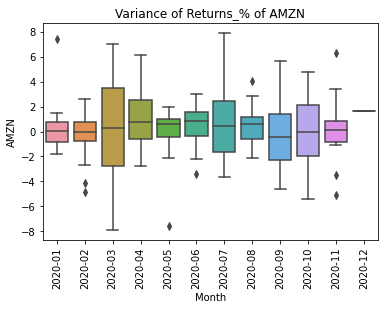

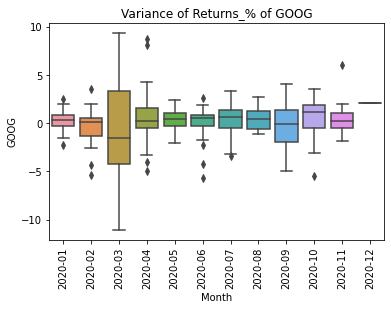

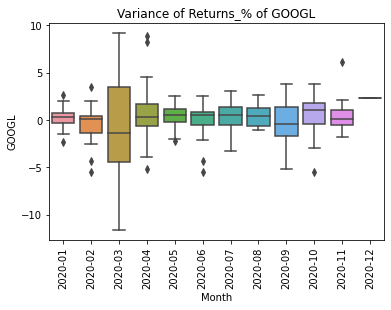

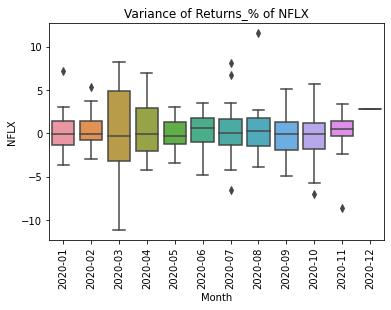

In [222]:
plot_variance(name_important_stocks, df_returns, country, 'Returns_%')

### Plot difference difference open closing

In order to understand how much they loose each day

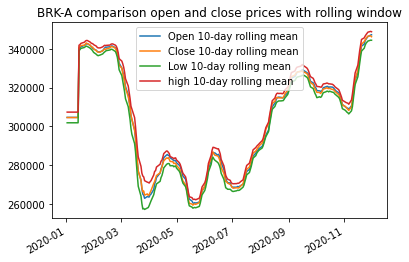

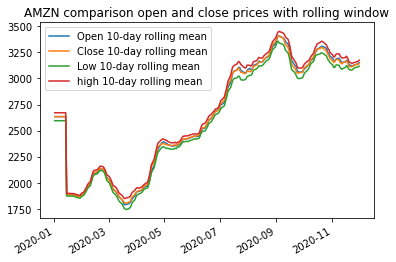

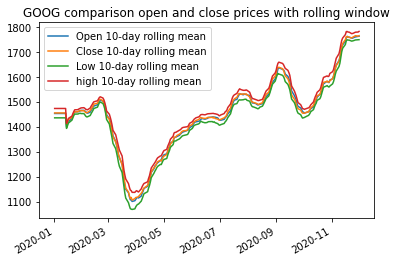

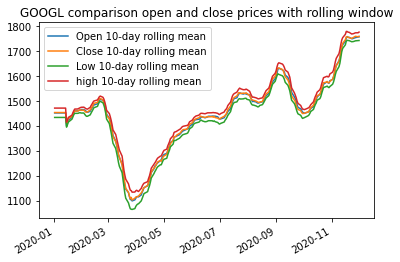

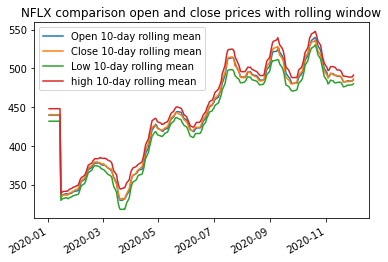

In [223]:
df = {'open': openn[country], 'close': close[country], 'high': high[country], 'low': low[country]}

plot_rolling_timeseries(index, name_important_stocks, df, 10, country, 'comparison open and close prices')

### Comparison SP500

In [224]:
#  create the SP500 dataframe and merge it to tnhe returns dataframe
df_returns_sp500 = create_merge_SP500_index(df_sp500_stocks, df_returns)
df_returns_sp500.head()

BRK-A      AMZN      GOOG     GOOGL      NFLX     SP500
Date                                                                  
2020-01-07 -0.384762  0.209156 -0.062401 -0.193165 -1.512666  0.549624
2020-01-08  0.084685 -0.780866  0.788033  0.711776  2.572943 -0.370652
2020-01-09  1.201399  0.479927  1.104450  1.049792 -1.061135  0.251415
2020-01-10 -0.896689 -0.941060  0.697268  0.645865 -1.969259 -0.071727
2020-01-13  0.784867  0.432253  0.664461  0.774694  2.999552  0.347526

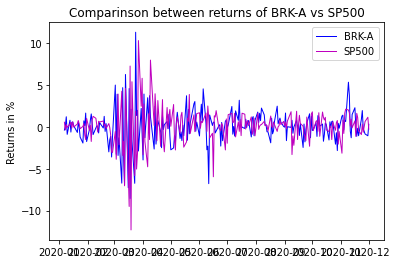

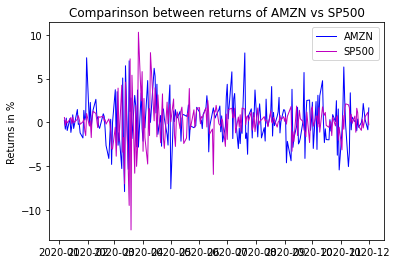

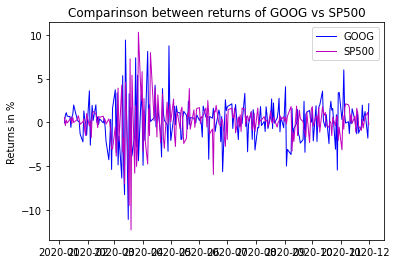

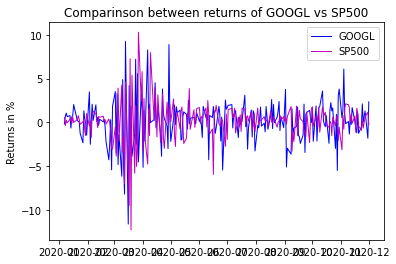

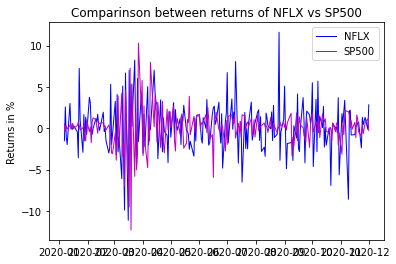

In [225]:
plot_sp500_comparison (df_returns_sp500, name_important_stocks, country, 'returns')

In this way it is really hard to enderstand (no good plot). Therefore, let us work with rolling windows, which lend to much more readable results

**Comparison with Rolling Windows:**

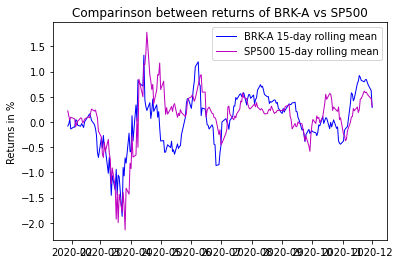

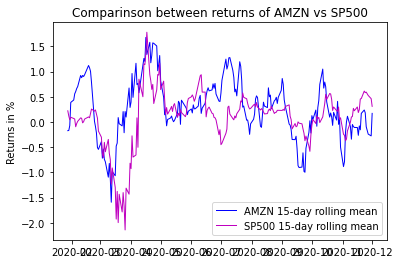

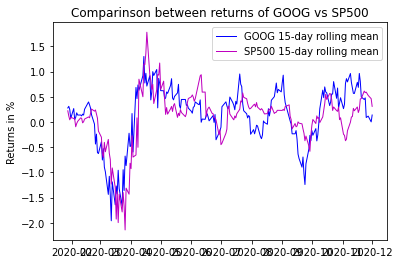

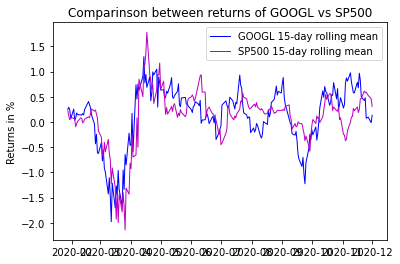

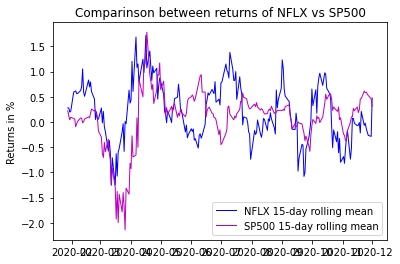

In [226]:
plot_sp500_comparison_rolling (df_returns_sp500, name_important_stocks, 15, country, 'returns')

# Japan  <a class="anchor" id="japan"></a>

In [227]:
country = 'Japan'

In [228]:
index = adj_close[country]['Date'] 

### Correlation Matrix adj prices

In [229]:
print(f"Corr Matrix Adj Prices first 50 companies China")
corr = adj_close[country].corr() 
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Corr Matrix Adj Prices first 50 companies China


In [230]:
# name first 5
name_important_stocks = extract_max(adj_close[country], 5, Names=True)

# dataset first 5
adj_close_imp = adj_close[country][name_important_stocks]
adj_close_imp['Data'] = index
adj_close_imp = adj_close_imp.set_index('Data')
adj_close_imp.head()

MITSUB       MITSY       SZKMY          TM        SNE
Data                                                                  
2020-01-02  2733.517578  347.638550  165.833923  139.752579  68.800194
2020-01-03  2733.517578  344.871155  164.968719  138.288635  67.823883
2020-01-06  2733.517578  350.951599  163.390701  138.308289  68.850006
2020-01-07  2766.217285  351.565491  164.192001  139.035339  69.935905
2020-01-08  2723.091553  353.806671  162.717224  138.691467  70.194931

In [231]:
# first 5 companies
print(f"Corr Matrix Adj Prices first 5 companies China")
corr = adj_close_imp.corr() 
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Corr Matrix Adj Prices first 5 companies China


### Plot time series adjusted closing price

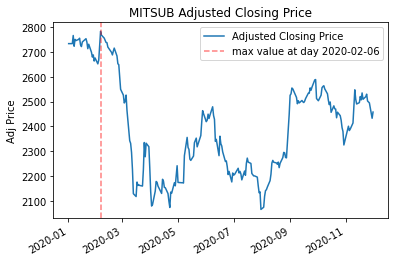

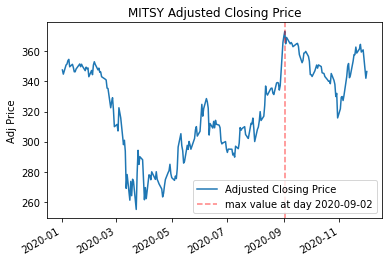

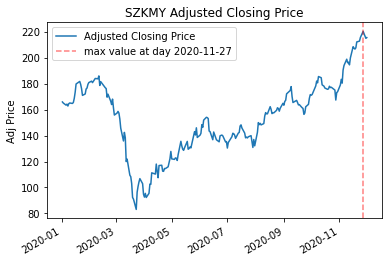

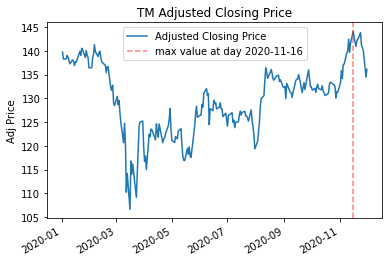

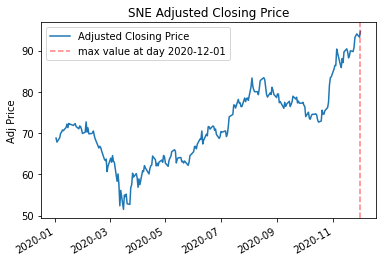

In [232]:
plot_price(index, adj_close_imp, name_important_stocks, country, 'Adjusted Closing Price', 'Adj Price')

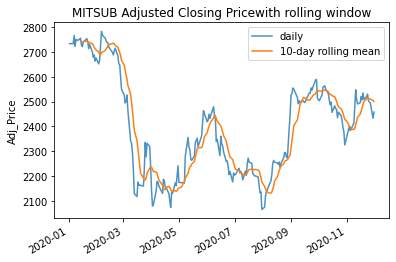

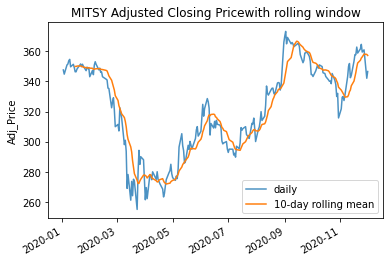

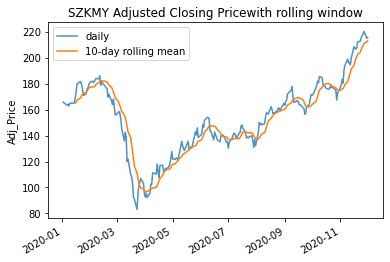

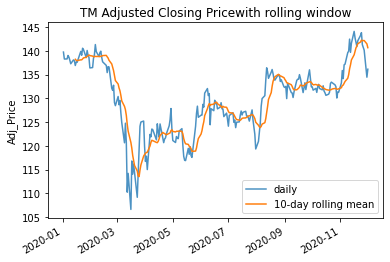

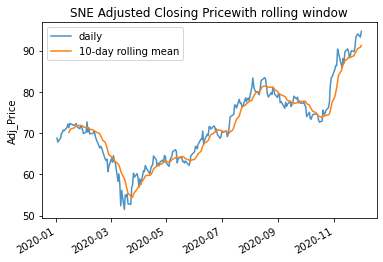

In [233]:
# plot with rolling of 10 days
plot_price_rolling(index, adj_close_imp, 10, name_important_stocks, country, 'Adjusted Closing Price', 'Adj_Price')

### Variance adjusted prices

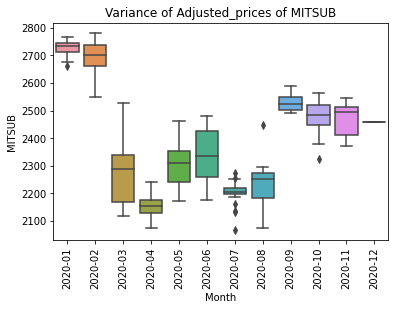

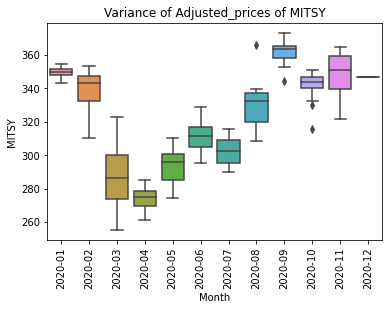

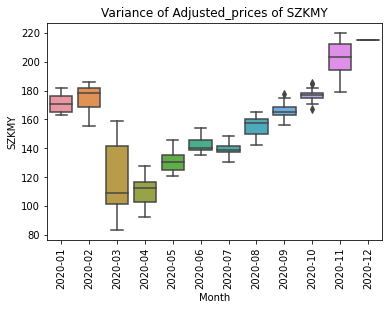

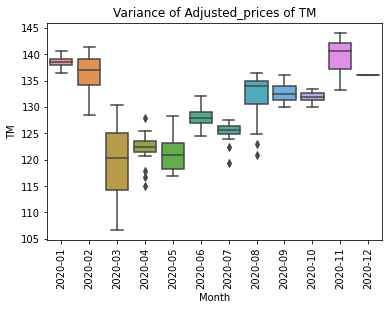

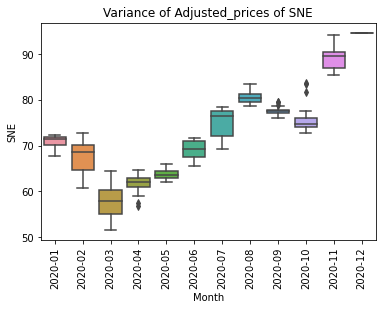

In [234]:
plot_variance(name_important_stocks, adj_close_imp, country, 'Adjusted_prices')

### Return:

$R_t = \frac{S_t-S_{t-1}}{S_{t-1}}$

In [235]:
df_returns = returns(name_important_stocks, adj_close_imp, index, country)
df_returns.head()

MITSUB     MITSY     SZKMY        TM       SNE
Date                                                        
2020-01-02       NaN       NaN       NaN       NaN       NaN
2020-01-03  0.000000 -0.796055 -0.521729 -1.047525 -1.419052
2020-01-06  0.000000  1.763106 -0.956556  0.014212  1.512923
2020-01-07  1.196250  0.174922  0.490420  0.525674  1.577196
2020-01-08 -1.559015  0.637486 -0.898203 -0.247327  0.370376

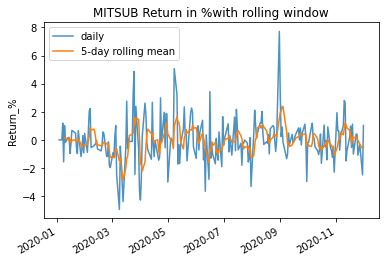

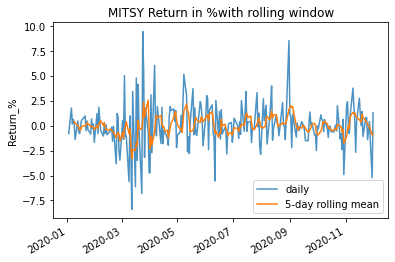

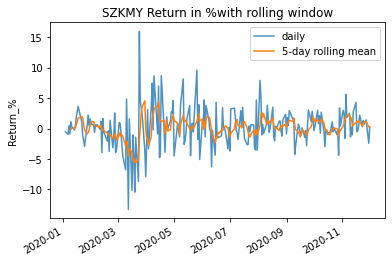

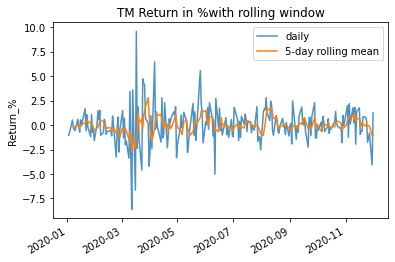

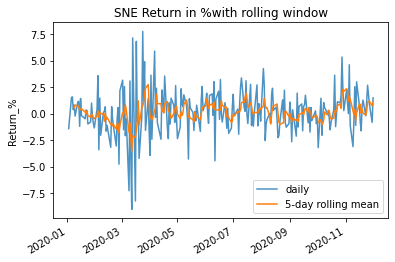

In [236]:
plot_price_rolling(index, df_returns, 5, name_important_stocks, country, 'Return in %', 'Return_%')

### Variance Returns

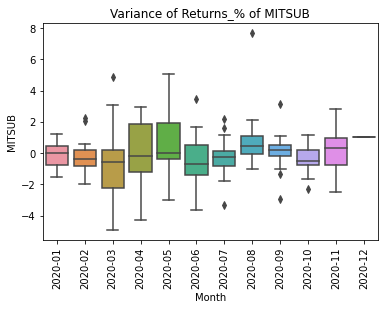

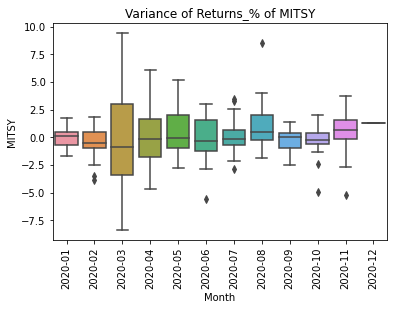

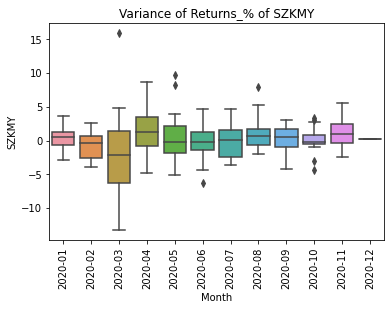

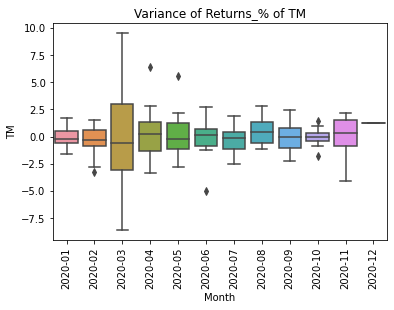

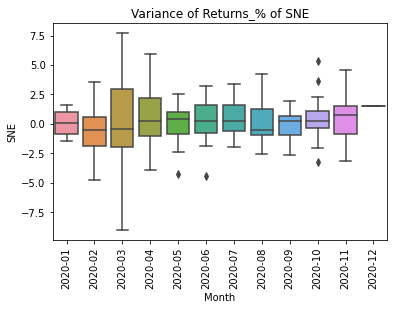

In [237]:
plot_variance(name_important_stocks, df_returns, country, 'Returns_%')

### Plot difference difference open closing

In order to understand how much they loose each day

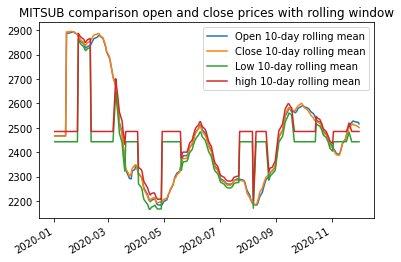

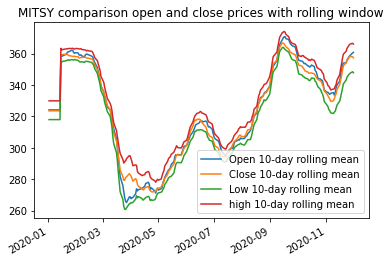

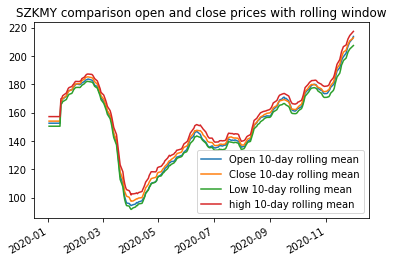

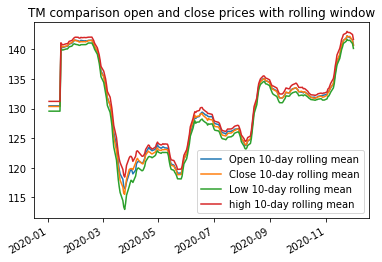

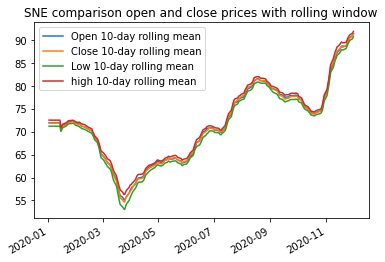

In [238]:
df = {'open': openn[country], 'close': close[country], 'high': high[country], 'low': low[country]}

plot_rolling_timeseries(index, name_important_stocks, df, 10, country, 'comparison open and close prices')

### Comparison SP500

In [239]:
#  create the SP500 dataframe and merge it to tnhe returns dataframe
df_returns_sp500 = create_merge_SP500_index(df_sp500_stocks, df_returns)
df_returns_sp500.head()

MITSUB     MITSY     SZKMY        TM       SNE     SP500
Date                                                                  
2020-01-07  1.196250  0.174922  0.490420  0.525674  1.577196  0.549624
2020-01-08 -1.559015  0.637486 -0.898203 -0.247327  0.370376 -0.370652
2020-01-09  1.009388  0.247871  1.108766 -0.460476  0.808970  0.251415
2020-01-10 -0.172292 -1.392886  0.325689 -0.555119 -0.239342 -0.071727
2020-01-13  0.172593  0.476424 -0.226353  0.593996  1.100767  0.347526

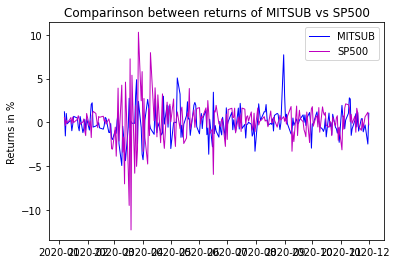

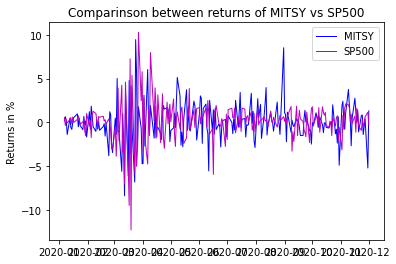

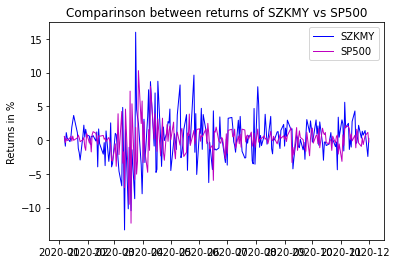

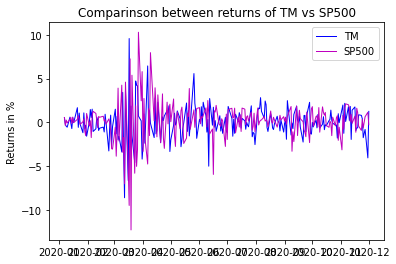

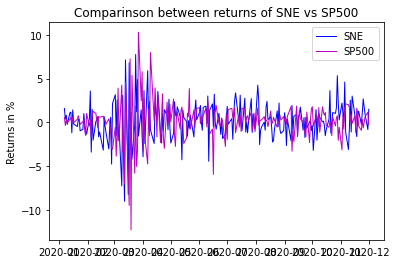

In [240]:
plot_sp500_comparison (df_returns_sp500, name_important_stocks, country, 'returns')

In this way it is really hard to enderstand (no good plot). Therefore, let us work with rolling windows, which lend to much more readable results

**Comparison with Rolling Windows:**

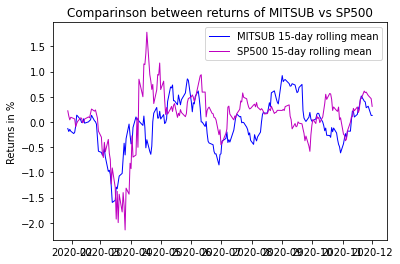

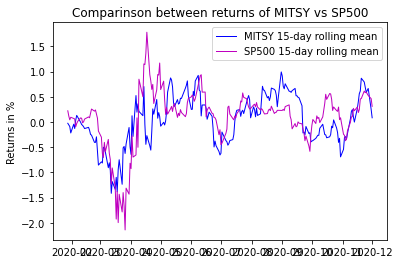

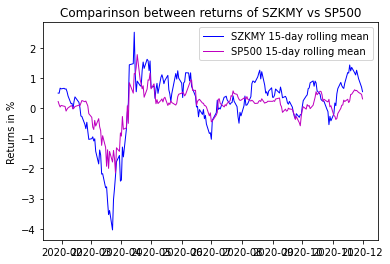

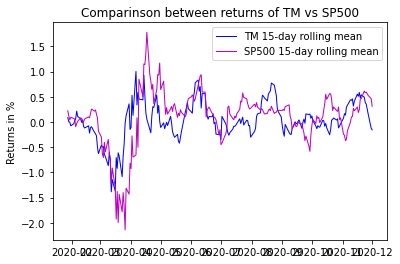

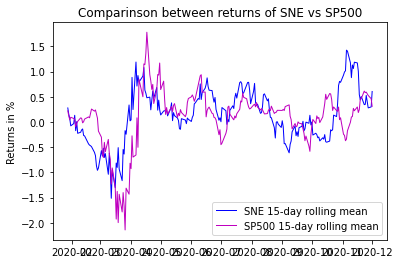

In [241]:
plot_sp500_comparison_rolling (df_returns_sp500, name_important_stocks, 15, country, 'returns')

# Switzerland  <a class="anchor" id="swiss"></a>

In [242]:
country = 'Switzerland'

In [243]:
index = adj_close[country]['Date'] 

### Correlation Matrix adj prices

In [244]:
print(f"Corr Matrix Adj Prices first 50 companies China")
corr = adj_close[country].corr() 
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Corr Matrix Adj Prices first 50 companies China


In [245]:
# name first 5
name_important_stocks = extract_max(adj_close[country], 5, Names=True)

# dataset first 5
adj_close_imp = adj_close[country][name_important_stocks]
adj_close_imp['Data'] = index
adj_close_imp = adj_close_imp.set_index('Data')
adj_close_imp.head()

LINDT      SGSN.SW      BARN.SW     PGHN.SW     SCMN.SW
Data                                                                      
2020-01-02  86079.242188  2568.275879  2093.832520  866.239929  494.463837
2020-01-03  86079.242188  2568.275879  2093.832520  866.239929  494.463837
2020-01-06  85484.218750  2551.862061  2123.518066  865.854065  496.767181
2020-01-07  85682.562500  2548.000000  2139.350586  871.834778  497.726929
2020-01-08  85880.898438  2543.172363  2109.664795  884.953857  497.918915

In [246]:
# first 5 companies
print(f"Corr Matrix Adj Prices first 5 companies China")
corr = adj_close_imp.corr() 
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Corr Matrix Adj Prices first 5 companies China


### Plot time series adjusted closing price

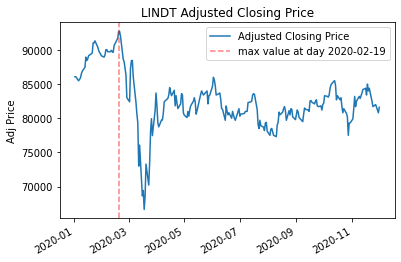

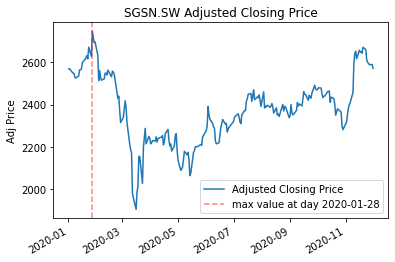

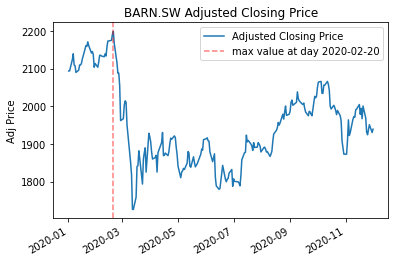

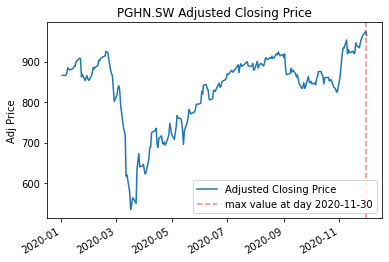

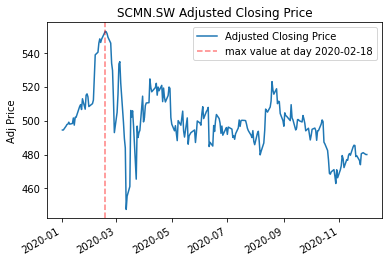

In [247]:
plot_price(index, adj_close_imp, name_important_stocks, country, 'Adjusted Closing Price', 'Adj Price')

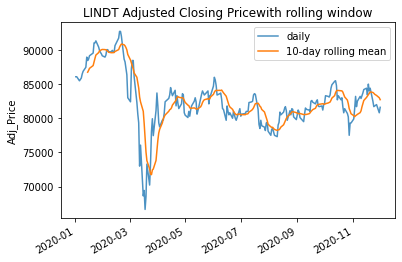

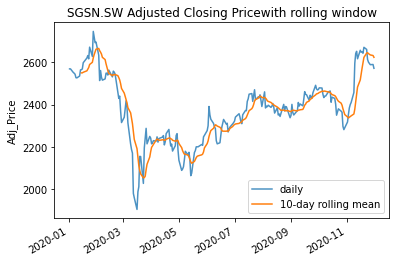

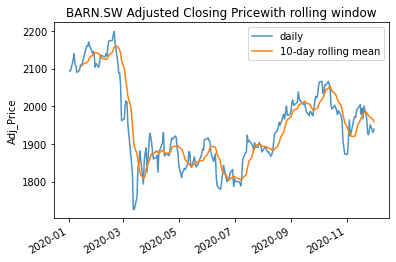

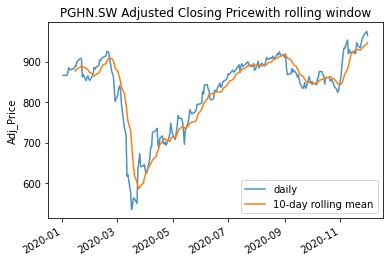

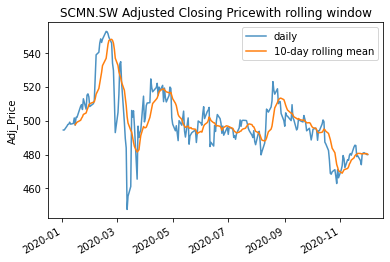

In [248]:
# plot with rolling of 10 days
plot_price_rolling(index, adj_close_imp, 10, name_important_stocks, country, 'Adjusted Closing Price', 'Adj_Price')

### Variance adjusted prices

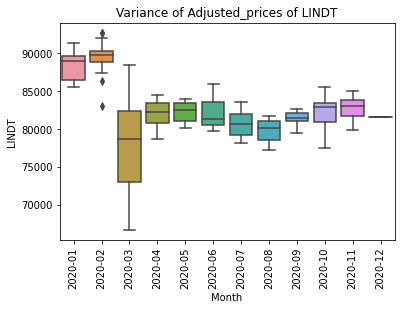

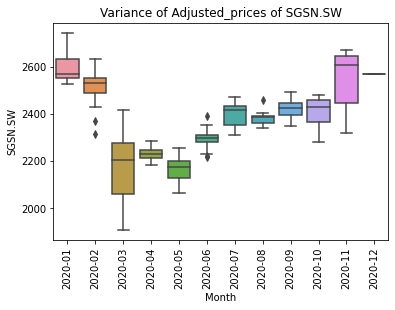

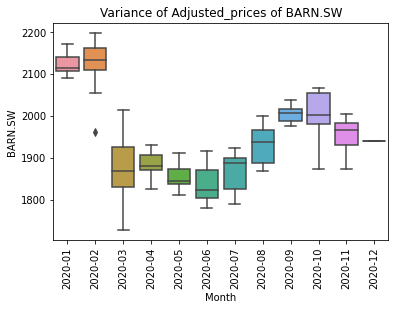

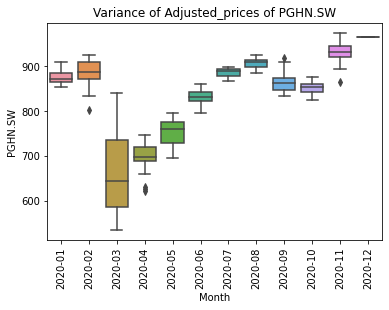

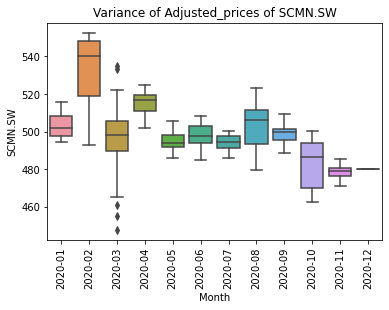

In [249]:
plot_variance(name_important_stocks, adj_close_imp, country, 'Adjusted_prices')

### Return:

$R_t = \frac{S_t-S_{t-1}}{S_{t-1}}$

In [250]:
df_returns = returns(name_important_stocks, adj_close_imp, index, country)
df_returns.head()

LINDT   SGSN.SW   BARN.SW   PGHN.SW   SCMN.SW
Date                                                        
2020-01-02       NaN       NaN       NaN       NaN       NaN
2020-01-03  0.000000  0.000000  0.000000  0.000000  0.000000
2020-01-06 -0.691251 -0.639099  1.417761 -0.044545  0.465827
2020-01-07  0.232024 -0.151343  0.745580  0.690730  0.193199
2020-01-08  0.231478 -0.189468 -1.387608  1.504767  0.038573

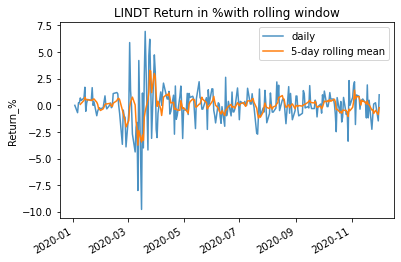

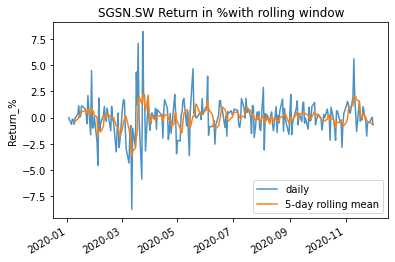

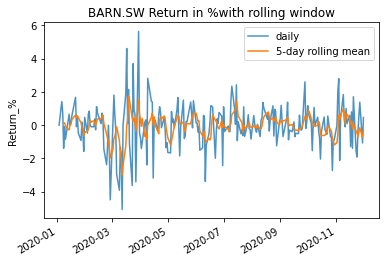

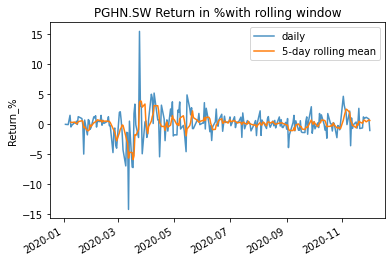

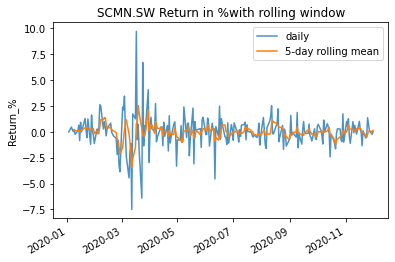

In [251]:
plot_price_rolling(index, df_returns, 5, name_important_stocks, country, 'Return in %', 'Return_%')

### Variance Returns

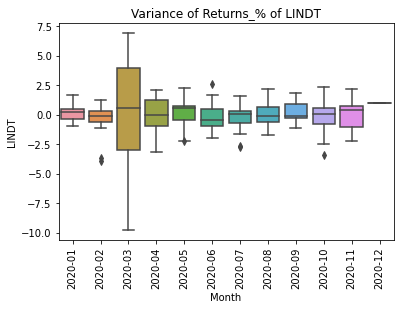

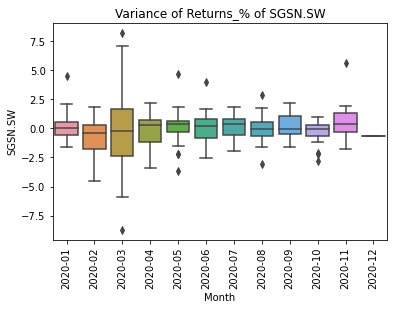

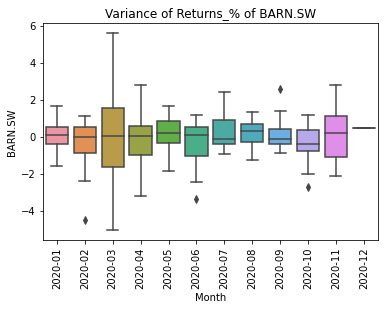

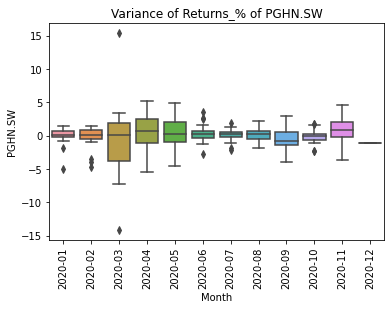

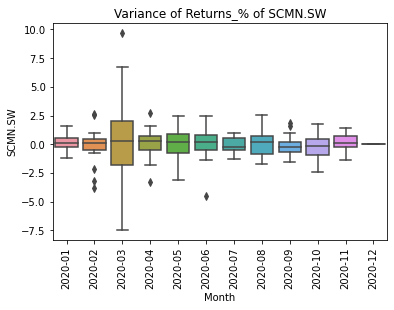

In [252]:
plot_variance(name_important_stocks, df_returns, country, 'Returns_%')

### Plot difference difference open closing

In order to understand how much they loose each day

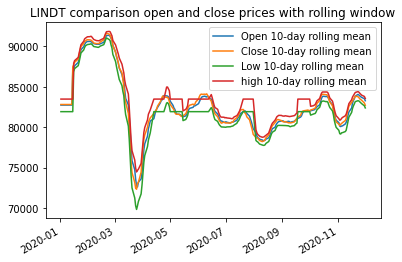

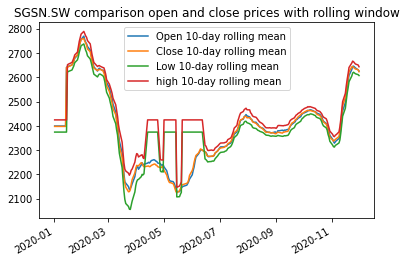

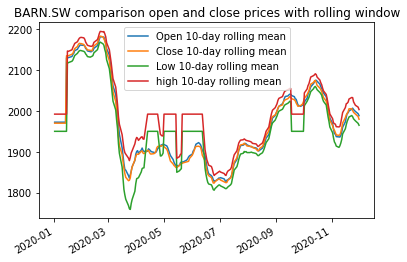

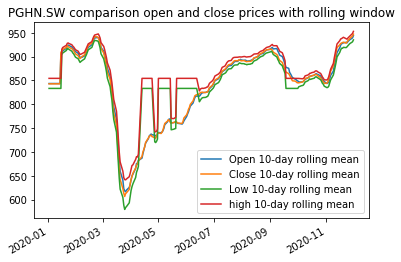

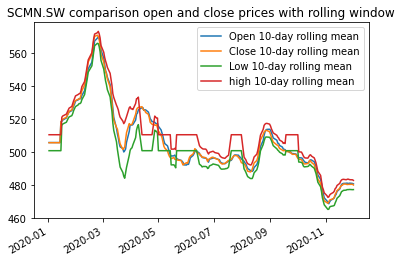

In [253]:
df = {'open': openn[country], 'close': close[country], 'high': high[country], 'low': low[country]}

plot_rolling_timeseries(index, name_important_stocks, df, 10, country, 'comparison open and close prices')

### Comparison SP500

In [254]:
#  create the SP500 dataframe and merge it to tnhe returns dataframe
df_returns_sp500 = create_merge_SP500_index(df_sp500_stocks, df_returns)
df_returns_sp500.head()

LINDT   SGSN.SW   BARN.SW   PGHN.SW   SCMN.SW     SP500
Date                                                                  
2020-01-07  0.232024 -0.151343  0.745580  0.690730  0.193199  0.549624
2020-01-08  0.231478 -0.189468 -1.387608  1.504767  0.038573 -0.370652
2020-01-09  0.692838 -0.645407 -0.093807 -0.436021  0.231303  0.251415
2020-01-10  0.458717 -0.038214 -0.845075 -0.153271 -0.230770 -0.071727
2020-01-13  0.684938  0.344038  0.284096  0.285082  0.077103  0.347526

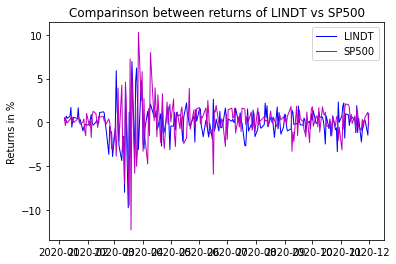

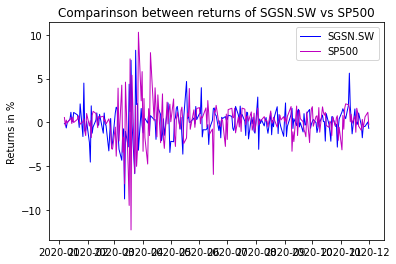

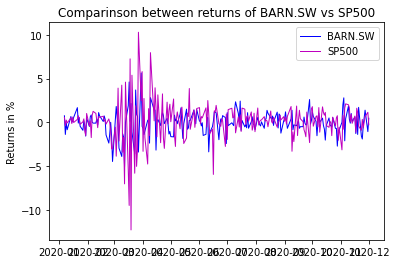

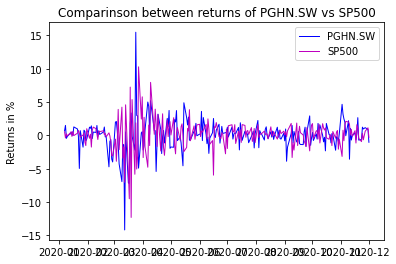

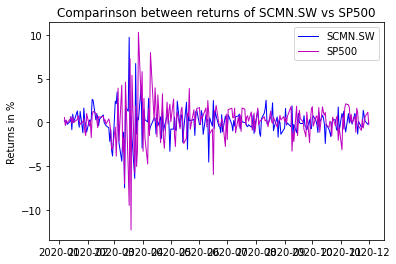

In [255]:
plot_sp500_comparison (df_returns_sp500, name_important_stocks, country, 'returns')

In this way it is really hard to enderstand (no good plot). Therefore, let us work with rolling windows, which lend to much more readable results

**Comparison with Rolling Windows:**

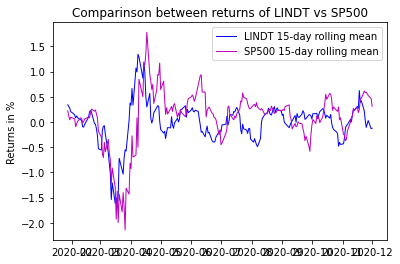

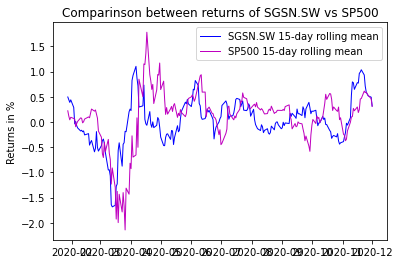

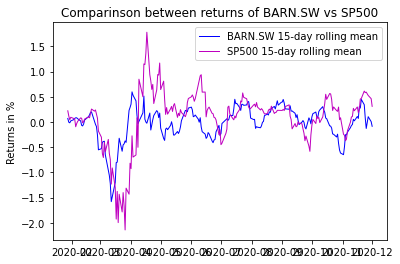

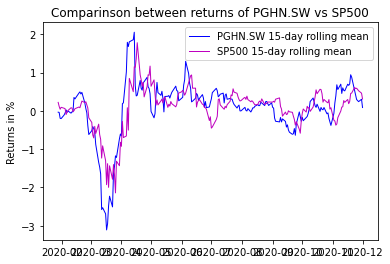

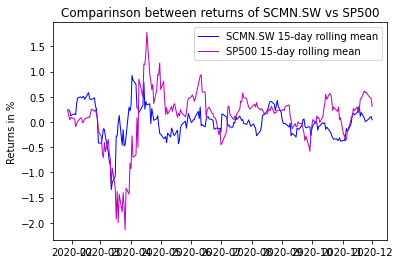

In [256]:
plot_sp500_comparison_rolling (df_returns_sp500, name_important_stocks, 15, country, 'returns')

## Create portfolios with adjusted closed price
### EW

In [ ]:
df_portfolio = pd.DataFrame(index=date_index[1:])

In [ ]:
adj_close = datasets['adj_close'].set_index('Date')
returns_all = (adj_close - adj_close.shift(1))/adj_close.shift(1) # return calculated as fraction/decimal
returns_all = returns_all.iloc[1:] # ignore first row
returns_all.head(10)

In [ ]:
df_portfolio['EW'] = returns_all.mean(axis=1).values
df_portfolio.head()

### VW
The first 5 have 60% of the value and all the others 40%

In [ ]:
# names two groups
stocks_60_names =  highest_name
stocks_40_names = [ stock for stock in returns_all.columns if stock not in  highest_name]  

# stocks value two groups
stocks_60 = returns_all[stocks_60_names]
stocks_40 = returns_all[stocks_40_names]

# mean each group
stocks_60_mean = stocks_60.mean(axis=1).values
stocks_40_mean = stocks_40.mean(axis=1).values

# weight 60 40:
df_portfolio['VW'] = stocks_60_mean * 0.6 + stocks_40_mean * 0.4

Of course the VW portfolio has higher values

In [ ]:
df_portfolio.head()

In [ ]:
# save:
df_portfolio.to_csv('datasets_stocks/japan_portfolio.csv')